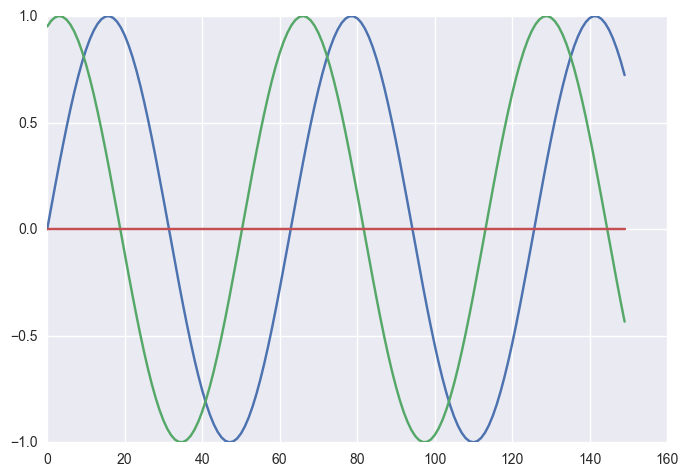

In [1]:
%matplotlib inline
import numpy as np
import pylab as plt
import seaborn

T = 150
t = .4

A = np.sin(np.array(range(T))/10)
B = np.sin((np.array(range(T))/10 + t*np.pi))
C = np.zeros((T))

plt.plot(A)
plt.plot(B)
plt.plot(C)
plt.show()

In [3]:
δ = lambda a,b: (a - b)**2
first = lambda x: x[0]
second = lambda x: x[1]

def minVal(v1, v2, v3):
    if first(v1) <= min(first(v2), first(v3)):
        return v1, 0
    elif first(v2) <= first(v3):
        return v2, 1
    else:
        return v3, 2 

def calc_dtw(A, B):
    S = len(A)
    T = len(B)

    m = [[0 for j in range(T)] for i in range(S)]
    m[0][0] = (δ(A[0],B[0]), (-1,-1))
    for i in range(1,S):
        m[i][0] = (m[i-1][0][0] + δ(A[i], B[0]), (i-1,0))
    for j in range(1,T):
        m[0][j] = (m[0][j-1][0] + δ(A[0], B[j]), (0,j-1))

    for i in range(1,S):
        for j in range(1,T):
            minimum, index = minVal(m[i-1][j], m[i][j-1], m[i-1][j-1])
            indexes = [(i-1,j), (i,j-1), (i-1,j-1)]
            m[i][j] = (first(minimum)+δ(A[i], B[j]), indexes[index])
    return m

In [12]:
%%timeit
calc_dtw(A, B)

10 loops, best of 3: 40.1 ms per loop


In [13]:
%%timeit
calc_dtw(A, C)

10 loops, best of 3: 37.5 ms per loop
